# 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model

In [6]:
new_vec = model['Eiffel_Tower']-model['Paris'] +model['Tokyo']
model.similar_by_vector(new_vec)

[('Eiffel_Tower', 0.7304459810256958),
 ('Tokyo', 0.627763032913208),
 ('Gundam_statue', 0.5324001908302307),
 ('Space_Needle', 0.5300050377845764),
 ('Sensoji_temple', 0.525956392288208),
 ('Shinjuku_Station', 0.5253906846046448),
 ('Yamanote', 0.5211979150772095),
 ('Tokyo_Ginza_district', 0.5195204615592957),
 ('DisneySea', 0.5187298059463501),
 ('Sagami_Bay', 0.5171850919723511)]

In [7]:
new_vec = model['macaroons']-model['Paris'] +model['Tokyo']
model.similar_by_vector(new_vec)

[('macaroons', 0.689482569694519),
 ('miso_soup', 0.5809105634689331),
 ('soba', 0.5806872248649597),
 ('okonomiyaki', 0.5783488750457764),
 ('mochi', 0.5708286762237549),
 ('umeboshi', 0.56321781873703),
 ('takoyaki', 0.563068151473999),
 ('bento_boxes', 0.5604833364486694),
 ('udon', 0.5537161827087402),
 ('soba_noodle', 0.552734375)]

In [2]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

# 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [3]:
model.similarity('United_States', 'U.S.')

0.73107743

# 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ

In [4]:
model.most_similar('United_States', topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

# 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ

In [5]:
new_vec = model['Spain'] - model['Madrid'] + model['Athens']
# positive, negative
model.similar_by_vector(new_vec)

[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472726821899),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361456871032715),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

# 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [42]:
import csv
f = open('questions-words.txt')
lst_a=[item.split()for item in f.read().replace(': capital-world\n','').splitlines()]
f.close()
lst_vec=[]
for i in range(1, len(lst_a)):
    low =[]
    new_vec = model[lst_a[i][1]]-model[lst_a[i][0]]+model[lst_a[i][2]]
    new_word= model.similar_by_vector(new_vec, topn=1)
    low.extend(lst_a[i])
    low.extend(new_word[0])
    print(low)
    lst_vec.append(low)

['Athens', 'Greece', 'Baghdad', 'Iraq', 'Baghdad', 0.7489826679229736]
['Athens', 'Greece', 'Bangkok', 'Thailand', 'Bangkok', 0.7431141138076782]
['Athens', 'Greece', 'Beijing', 'China', 'China', 0.7186591625213623]
['Athens', 'Greece', 'Berlin', 'Germany', 'Germany', 0.6720892786979675]
['Athens', 'Greece', 'Bern', 'Switzerland', 'Bern', 0.6902341842651367]
['Athens', 'Greece', 'Cairo', 'Egypt', 'Egypt', 0.7626821398735046]
['Athens', 'Greece', 'Canberra', 'Australia', 'Canberra', 0.7407206892967224]
['Athens', 'Greece', 'Hanoi', 'Vietnam', 'Hanoi', 0.7509901523590088]
['Athens', 'Greece', 'Havana', 'Cuba', 'Havana', 0.7262827754020691]
['Athens', 'Greece', 'Helsinki', 'Finland', 'Helsinki', 0.7235296964645386]
['Athens', 'Greece', 'Islamabad', 'Pakistan', 'Islamabad', 0.7821410894393921]
['Athens', 'Greece', 'Kabul', 'Afghanistan', 'Kabul', 0.7715259790420532]
['Athens', 'Greece', 'London', 'England', 'London', 0.5891345143318176]
['Athens', 'Greece', 'Madrid', 'Spain', 'Spain', 0.71

['Bern', 'Switzerland', 'Helsinki', 'Finland', 'Helsinki', 0.7343817949295044]
['Bern', 'Switzerland', 'Islamabad', 'Pakistan', 'Islamabad', 0.7136886119842529]
['Bern', 'Switzerland', 'Kabul', 'Afghanistan', 'Kabul', 0.7211526036262512]
['Bern', 'Switzerland', 'London', 'England', 'London', 0.611396074295044]
['Bern', 'Switzerland', 'Madrid', 'Spain', 'Madrid', 0.6865501403808594]
['Bern', 'Switzerland', 'Moscow', 'Russia', 'Moscow', 0.6645195484161377]
['Bern', 'Switzerland', 'Oslo', 'Norway', 'Oslo', 0.7214195728302002]
['Bern', 'Switzerland', 'Ottawa', 'Canada', 'Ottawa', 0.6489711999893188]
['Bern', 'Switzerland', 'Paris', 'France', 'Paris', 0.6419802308082581]
['Bern', 'Switzerland', 'Rome', 'Italy', 'Italy', 0.6215108633041382]
['Bern', 'Switzerland', 'Stockholm', 'Sweden', 'Stockholm', 0.71843421459198]
['Bern', 'Switzerland', 'Tehran', 'Iran', 'Iran', 0.7353845238685608]
['Bern', 'Switzerland', 'Tokyo', 'Japan', 'Tokyo', 0.7072820663452148]
['Bern', 'Switzerland', 'Athens', 'G

['Helsinki', 'Finland', 'Rome', 'Italy', 'Italy', 0.650847315788269]
['Helsinki', 'Finland', 'Stockholm', 'Sweden', 'Sweden', 0.8030410408973694]
['Helsinki', 'Finland', 'Tehran', 'Iran', 'Iran', 0.7987492084503174]
['Helsinki', 'Finland', 'Tokyo', 'Japan', 'Japan', 0.7924773097038269]
['Helsinki', 'Finland', 'Athens', 'Greece', 'Greece', 0.6250158548355103]
['Helsinki', 'Finland', 'Baghdad', 'Iraq', 'Baghdad', 0.7385860681533813]
['Helsinki', 'Finland', 'Bangkok', 'Thailand', 'Thailand', 0.7465246319770813]
['Helsinki', 'Finland', 'Beijing', 'China', 'China', 0.7314399480819702]
['Helsinki', 'Finland', 'Berlin', 'Germany', 'Germany', 0.6982749104499817]
['Helsinki', 'Finland', 'Bern', 'Switzerland', 'Bern', 0.7078851461410522]
['Helsinki', 'Finland', 'Cairo', 'Egypt', 'Egypt', 0.7174116373062134]
['Helsinki', 'Finland', 'Canberra', 'Australia', 'Canberra', 0.7354408502578735]
['Helsinki', 'Finland', 'Hanoi', 'Vietnam', 'Hanoi', 0.7185734510421753]
['Helsinki', 'Finland', 'Havana', 'Cu

['Moscow', 'Russia', 'Beijing', 'China', 'China', 0.8606364130973816]
['Moscow', 'Russia', 'Berlin', 'Germany', 'Germany', 0.7635688185691833]
['Moscow', 'Russia', 'Bern', 'Switzerland', 'Bern', 0.8088141083717346]
['Moscow', 'Russia', 'Cairo', 'Egypt', 'Egypt', 0.7937749624252319]
['Moscow', 'Russia', 'Canberra', 'Australia', 'Canberra', 0.8216283321380615]
['Moscow', 'Russia', 'Hanoi', 'Vietnam', 'Hanoi', 0.8279412984848022]
['Moscow', 'Russia', 'Havana', 'Cuba', 'Havana', 0.8038153648376465]
['Moscow', 'Russia', 'Helsinki', 'Finland', 'Helsinki', 0.8125902414321899]
['Moscow', 'Russia', 'Islamabad', 'Pakistan', 'Pakistan', 0.8441810607910156]
['Moscow', 'Russia', 'Kabul', 'Afghanistan', 'Kabul', 0.8383434414863586]
['Moscow', 'Russia', 'London', 'England', 'London', 0.6919373869895935]
['Moscow', 'Russia', 'Madrid', 'Spain', 'Spain', 0.7854111194610596]
['Oslo', 'Norway', 'Ottawa', 'Canada', 'Ottawa', 0.7005045413970947]
['Oslo', 'Norway', 'Paris', 'France', 'France', 0.689956784248

['Stockholm', 'Sweden', 'Madrid', 'Spain', 'Spain', 0.7526834011077881]
['Stockholm', 'Sweden', 'Moscow', 'Russia', 'Russia', 0.8036783337593079]
['Stockholm', 'Sweden', 'Oslo', 'Norway', 'Norway', 0.7683368921279907]
['Stockholm', 'Sweden', 'Ottawa', 'Canada', 'Ottawa', 0.7056350708007812]
['Stockholm', 'Sweden', 'Paris', 'France', 'France', 0.7466069459915161]
['Stockholm', 'Sweden', 'Rome', 'Italy', 'Italy', 0.6953161954879761]
['Tehran', 'Iran', 'Tokyo', 'Japan', 'Tokyo', 0.8009018301963806]
['Tehran', 'Iran', 'Athens', 'Greece', 'Athens', 0.7758322954177856]
['Tehran', 'Iran', 'Baghdad', 'Iraq', 'Baghdad', 0.8230853080749512]
['Tehran', 'Iran', 'Bangkok', 'Thailand', 'Bangkok', 0.8093585968017578]
['Tehran', 'Iran', 'Beijing', 'China', 'China', 0.7839036583900452]
['Tehran', 'Iran', 'Berlin', 'Germany', 'Berlin', 0.7528035044670105]
['Tehran', 'Iran', 'Bern', 'Switzerland', 'Bern', 0.7904287576675415]
['Tehran', 'Iran', 'Cairo', 'Egypt', 'Cairo', 0.7699517011642456]
['Tehran', 'Ir

['Accra', 'Ghana', 'Cairo', 'Egypt', 'Egypt', 0.7316036224365234]
['Accra', 'Ghana', 'Canberra', 'Australia', 'Australia', 0.7511561512947083]
['Accra', 'Ghana', 'Caracas', 'Venezuela', 'Venezuela', 0.7515694499015808]
['Accra', 'Ghana', 'Chisinau', 'Moldova', 'Chisinau', 0.7693170309066772]
['Accra', 'Ghana', 'Conakry', 'Guinea', 'Conakry', 0.807256817817688]
['Accra', 'Ghana', 'Copenhagen', 'Denmark', 'Copenhagen', 0.7476184964179993]
['Accra', 'Ghana', 'Dakar', 'Senegal', 'Dakar', 0.7515448331832886]
['Accra', 'Ghana', 'Damascus', 'Syria', 'Syria', 0.7329688668251038]
['Accra', 'Ghana', 'Dhaka', 'Bangladesh', 'Bangladesh', 0.8021045327186584]
['Accra', 'Ghana', 'Doha', 'Qatar', 'Doha', 0.7577405571937561]
['Accra', 'Ghana', 'Dublin', 'Ireland', 'Ireland', 0.7539541721343994]
['Accra', 'Ghana', 'Dushanbe', 'Tajikistan', 'Tajikistan', 0.743198037147522]
['Accra', 'Ghana', 'Funafuti', 'Tuvalu', 'Funafuti', 0.6598362922668457]
['Algiers', 'Algeria', 'Amman', 'Jordan', 'Amman', 0.6253884

['Ankara', 'Turkey', 'Brussels', 'Belgium', 'Brussels', 0.6688398122787476]
['Ankara', 'Turkey', 'Bucharest', 'Romania', 'Romania', 0.7609705924987793]
['Ankara', 'Turkey', 'Budapest', 'Hungary', 'Hungary', 0.7319669723510742]
['Ankara', 'Turkey', 'Bujumbura', 'Burundi', 'Bujumbura', 0.812671422958374]
['Ankara', 'Turkey', 'Cairo', 'Egypt', 'Egypt', 0.7117065191268921]
['Ankara', 'Turkey', 'Canberra', 'Australia', 'Canberra', 0.737267792224884]
['Ankara', 'Turkey', 'Caracas', 'Venezuela', 'Caracas', 0.7515795230865479]
['Ankara', 'Turkey', 'Chisinau', 'Moldova', 'Chisinau', 0.7851541042327881]
['Ankara', 'Turkey', 'Conakry', 'Guinea', 'Conakry', 0.8369925618171692]
['Ankara', 'Turkey', 'Copenhagen', 'Denmark', 'Copenhagen', 0.767314076423645]
['Ankara', 'Turkey', 'Dakar', 'Senegal', 'Dakar', 0.7836768627166748]
['Ankara', 'Turkey', 'Damascus', 'Syria', 'Syria', 0.6997510194778442]
['Ankara', 'Turkey', 'Dhaka', 'Bangladesh', 'Dhaka', 0.7673868536949158]
['Ankara', 'Turkey', 'Doha', 'Qat

['Ashgabat', 'Turkmenistan', 'Beirut', 'Lebanon', 'Beirut', 0.7098561525344849]
['Ashgabat', 'Turkmenistan', 'Belgrade', 'Serbia', 'Serbia', 0.7046992182731628]
['Ashgabat', 'Turkmenistan', 'Belmopan', 'Belize', 'Belmopan', 0.7436010837554932]
['Ashgabat', 'Turkmenistan', 'Berlin', 'Germany', 'Berlin', 0.6567752361297607]
['Ashgabat', 'Turkmenistan', 'Bern', 'Switzerland', 'Bern', 0.6854249238967896]
['Ashgabat', 'Turkmenistan', 'Bishkek', 'Kyrgyzstan', 'Bishkek', 0.7680736780166626]
['Ashgabat', 'Turkmenistan', 'Bratislava', 'Slovakia', 'Bratislava', 0.6941064596176147]
['Ashgabat', 'Turkmenistan', 'Brussels', 'Belgium', 'Brussels', 0.6576407551765442]
['Ashgabat', 'Turkmenistan', 'Bucharest', 'Romania', 'Romania', 0.7250853776931763]
['Ashgabat', 'Turkmenistan', 'Budapest', 'Hungary', 'Hungary', 0.690912663936615]
['Ashgabat', 'Turkmenistan', 'Bujumbura', 'Burundi', 'Bujumbura', 0.7846744060516357]
['Ashgabat', 'Turkmenistan', 'Cairo', 'Egypt', 'Egypt', 0.7326546907424927]
['Ashgabat

['Astana', 'Kazakhstan', 'Helsinki', 'Finland', 'Helsinki', 0.6387671232223511]
['Astana', 'Kazakhstan', 'Islamabad', 'Pakistan', 'Pakistan', 0.6377488374710083]
['Astana', 'Kazakhstan', 'Jakarta', 'Indonesia', 'Jakarta', 0.6609564423561096]
['Athens', 'Greece', 'Baghdad', 'Iraq', 'Baghdad', 0.7489826679229736]
['Athens', 'Greece', 'Baku', 'Azerbaijan', 'Baku', 0.765723705291748]
['Athens', 'Greece', 'Bamako', 'Mali', 'Bamako', 0.7890918254852295]
['Athens', 'Greece', 'Bangkok', 'Thailand', 'Bangkok', 0.7431141138076782]
['Athens', 'Greece', 'Banjul', 'Gambia', 'Banjul', 0.7981548309326172]
['Athens', 'Greece', 'Beijing', 'China', 'China', 0.7186591625213623]
['Athens', 'Greece', 'Beirut', 'Lebanon', 'Beirut', 0.761629581451416]
['Athens', 'Greece', 'Belgrade', 'Serbia', 'Belgrade', 0.754311203956604]
['Athens', 'Greece', 'Belmopan', 'Belize', 'Belmopan', 0.7716623544692993]
['Athens', 'Greece', 'Berlin', 'Germany', 'Germany', 0.6720892786979675]
['Athens', 'Greece', 'Bern', 'Switzerla

['Baku', 'Azerbaijan', 'Georgetown', 'Guyana', 'Georgetown', 0.7881947159767151]
['Baku', 'Azerbaijan', 'Hanoi', 'Vietnam', 'Hanoi', 0.8187422156333923]
['Baku', 'Azerbaijan', 'Harare', 'Zimbabwe', 'Harare', 0.8469839096069336]
['Baku', 'Azerbaijan', 'Havana', 'Cuba', 'Cuba', 0.8092164397239685]
['Baku', 'Azerbaijan', 'Helsinki', 'Finland', 'Helsinki', 0.7937787771224976]
['Baku', 'Azerbaijan', 'Islamabad', 'Pakistan', 'Islamabad', 0.8379460573196411]
['Baku', 'Azerbaijan', 'Jakarta', 'Indonesia', 'Jakarta', 0.8347746133804321]
['Baku', 'Azerbaijan', 'Kabul', 'Afghanistan', 'Kabul', 0.8352220058441162]
['Baku', 'Azerbaijan', 'Kampala', 'Uganda', 'Kampala', 0.8351650834083557]
['Baku', 'Azerbaijan', 'Kathmandu', 'Nepal', 'Kathmandu', 0.8186012506484985]
['Bamako', 'Mali', 'Bangkok', 'Thailand', 'Thailand', 0.6719001531600952]
['Bamako', 'Mali', 'Banjul', 'Gambia', 'Banjul', 0.6635140180587769]
['Bamako', 'Mali', 'Beijing', 'China', 'China', 0.6110231876373291]
['Bamako', 'Mali', 'Beirut

['Banjul', 'Gambia', 'Dublin', 'Ireland', 'Ireland', 0.7012227177619934]
['Banjul', 'Gambia', 'Dushanbe', 'Tajikistan', 'Dushanbe', 0.7600803375244141]
['Banjul', 'Gambia', 'Funafuti', 'Tuvalu', 'Funafuti', 0.6993131041526794]
['Banjul', 'Gambia', 'Gaborone', 'Botswana', 'Gaborone', 0.7486246824264526]
['Banjul', 'Gambia', 'Georgetown', 'Guyana', 'Georgetown', 0.707505464553833]
['Banjul', 'Gambia', 'Hanoi', 'Vietnam', 'Hanoi', 0.7269363403320312]
['Banjul', 'Gambia', 'Harare', 'Zimbabwe', 'Zimbabwe', 0.795634388923645]
['Banjul', 'Gambia', 'Havana', 'Cuba', 'Cuba', 0.7051360011100769]
['Banjul', 'Gambia', 'Helsinki', 'Finland', 'Helsinki', 0.7087900638580322]
['Banjul', 'Gambia', 'Islamabad', 'Pakistan', 'Pakistan', 0.7461203336715698]
['Banjul', 'Gambia', 'Jakarta', 'Indonesia', 'Indonesia', 0.7842925786972046]
['Banjul', 'Gambia', 'Kabul', 'Afghanistan', 'Kabul', 0.7626500129699707]
['Banjul', 'Gambia', 'Kampala', 'Uganda', 'Uganda', 0.7758864164352417]
['Banjul', 'Gambia', 'Kathman

['Belgrade', 'Serbia', 'Dakar', 'Senegal', 'Dakar', 0.8243100047111511]
['Belgrade', 'Serbia', 'Damascus', 'Syria', 'Syria', 0.7865046262741089]
['Belgrade', 'Serbia', 'Dhaka', 'Bangladesh', 'Dhaka', 0.8203394412994385]
['Belgrade', 'Serbia', 'Doha', 'Qatar', 'Doha', 0.8140209317207336]
['Belgrade', 'Serbia', 'Dublin', 'Ireland', 'Ireland', 0.7390793561935425]
['Belgrade', 'Serbia', 'Dushanbe', 'Tajikistan', 'Dushanbe', 0.811832070350647]
['Belgrade', 'Serbia', 'Funafuti', 'Tuvalu', 'Funafuti', 0.759872317314148]
['Belgrade', 'Serbia', 'Gaborone', 'Botswana', 'Gaborone', 0.8304209113121033]
['Belgrade', 'Serbia', 'Georgetown', 'Guyana', 'Georgetown', 0.7560993432998657]
['Belgrade', 'Serbia', 'Hanoi', 'Vietnam', 'Hanoi', 0.7869541645050049]
['Belgrade', 'Serbia', 'Harare', 'Zimbabwe', 'Harare', 0.8188718557357788]
['Belgrade', 'Serbia', 'Havana', 'Cuba', 'Havana', 0.7598358988761902]
['Belgrade', 'Serbia', 'Helsinki', 'Finland', 'Helsinki', 0.7671212553977966]
['Belgrade', 'Serbia', 'I

['Bern', 'Switzerland', 'Cairo', 'Egypt', 'Cairo', 0.6299501657485962]
['Bern', 'Switzerland', 'Canberra', 'Australia', 'Canberra', 0.7265487909317017]
['Bern', 'Switzerland', 'Caracas', 'Venezuela', 'Caracas', 0.7216081619262695]
['Bern', 'Switzerland', 'Chisinau', 'Moldova', 'Chisinau', 0.7444862127304077]
['Bern', 'Switzerland', 'Conakry', 'Guinea', 'Conakry', 0.7984087467193604]
['Bern', 'Switzerland', 'Copenhagen', 'Denmark', 'Copenhagen', 0.7735663652420044]
['Bern', 'Switzerland', 'Dakar', 'Senegal', 'Dakar', 0.7442187070846558]
['Bern', 'Switzerland', 'Damascus', 'Syria', 'Syria', 0.6638391017913818]
['Bern', 'Switzerland', 'Dhaka', 'Bangladesh', 'Dhaka', 0.717640221118927]
['Bern', 'Switzerland', 'Doha', 'Qatar', 'Doha', 0.7532973885536194]
['Bern', 'Switzerland', 'Dublin', 'Ireland', 'Dublin', 0.7003709077835083]
['Bern', 'Switzerland', 'Dushanbe', 'Tajikistan', 'Dushanbe', 0.751026451587677]
['Bern', 'Switzerland', 'Funafuti', 'Tuvalu', 'Funafuti', 0.645478367805481]
['Bern'

['Bratislava', 'Slovakia', 'Libreville', 'Gabon', 'Libreville', 0.7539740800857544]
['Bratislava', 'Slovakia', 'Lilongwe', 'Malawi', 'Lilongwe', 0.7421801686286926]
['Bratislava', 'Slovakia', 'Lima', 'Peru', 'Lima', 0.608873724937439]
['Bratislava', 'Slovakia', 'Lisbon', 'Portugal', 'Portugal', 0.611042857170105]
['Bratislava', 'Slovakia', 'Ljubljana', 'Slovenia', 'Slovenia', 0.7402556538581848]
['Bratislava', 'Slovakia', 'London', 'England', 'Britain', 0.5212060809135437]
['Bratislava', 'Slovakia', 'Luanda', 'Angola', 'Luanda', 0.7293033599853516]
['Brussels', 'Belgium', 'Bucharest', 'Romania', 'Bucharest', 0.6688801646232605]
['Brussels', 'Belgium', 'Budapest', 'Hungary', 'Budapest', 0.6627697944641113]
['Brussels', 'Belgium', 'Bujumbura', 'Burundi', 'Bujumbura', 0.8030023574829102]
['Brussels', 'Belgium', 'Cairo', 'Egypt', 'Cairo', 0.6455693244934082]
['Brussels', 'Belgium', 'Canberra', 'Australia', 'Canberra', 0.6988887190818787]
['Brussels', 'Belgium', 'Caracas', 'Venezuela', 'Car

['Budapest', 'Hungary', 'Jakarta', 'Indonesia', 'Indonesia', 0.8298290967941284]
['Budapest', 'Hungary', 'Kabul', 'Afghanistan', 'Kabul', 0.7940714359283447]
['Budapest', 'Hungary', 'Kampala', 'Uganda', 'Kampala', 0.8009187579154968]
['Budapest', 'Hungary', 'Kathmandu', 'Nepal', 'Nepal', 0.8197487592697144]
['Budapest', 'Hungary', 'Khartoum', 'Sudan', 'Khartoum', 0.8057503700256348]
['Budapest', 'Hungary', 'Kiev', 'Ukraine', 'Ukraine', 0.8562574982643127]
['Budapest', 'Hungary', 'Kigali', 'Rwanda', 'Kigali', 0.7856190800666809]
['Budapest', 'Hungary', 'Kingston', 'Jamaica', 'Kingston', 0.7009487152099609]
['Budapest', 'Hungary', 'Libreville', 'Gabon', 'Libreville', 0.8244154453277588]
['Budapest', 'Hungary', 'Lilongwe', 'Malawi', 'Lilongwe', 0.8287032246589661]
['Budapest', 'Hungary', 'Lima', 'Peru', 'Lima', 0.709604799747467]
['Budapest', 'Hungary', 'Lisbon', 'Portugal', 'Lisbon', 0.7172321081161499]
['Budapest', 'Hungary', 'Ljubljana', 'Slovenia', 'Ljubljana', 0.8012913465499878]
['B

['Canberra', 'Australia', 'Hanoi', 'Vietnam', 'Hanoi', 0.7349317073822021]
['Canberra', 'Australia', 'Harare', 'Zimbabwe', 'Harare', 0.7784106135368347]
['Canberra', 'Australia', 'Havana', 'Cuba', 'Havana', 0.7401776313781738]
['Canberra', 'Australia', 'Helsinki', 'Finland', 'Helsinki', 0.7440007328987122]
['Canberra', 'Australia', 'Islamabad', 'Pakistan', 'Pakistan', 0.7668275833129883]
['Canberra', 'Australia', 'Jakarta', 'Indonesia', 'Jakarta', 0.768001139163971]
['Canberra', 'Australia', 'Kabul', 'Afghanistan', 'Kabul', 0.7651958465576172]
['Canberra', 'Australia', 'Kampala', 'Uganda', 'Kampala', 0.7694903612136841]
['Canberra', 'Australia', 'Kathmandu', 'Nepal', 'Kathmandu', 0.7349194884300232]
['Canberra', 'Australia', 'Khartoum', 'Sudan', 'Khartoum', 0.7647453546524048]
['Canberra', 'Australia', 'Kiev', 'Ukraine', 'Ukraine', 0.7528262734413147]
['Canberra', 'Australia', 'Kigali', 'Rwanda', 'Kigali', 0.7564103007316589]
['Canberra', 'Australia', 'Kingston', 'Jamaica', 'Kingston',

['Conakry', 'Guinea', 'Damascus', 'Syria', 'Damascus', 0.5007058382034302]
['Conakry', 'Guinea', 'Dhaka', 'Bangladesh', 'Bangladesh', 0.6098989248275757]
['Conakry', 'Guinea', 'Doha', 'Qatar', 'Doha', 0.6097303628921509]
['Conakry', 'Guinea', 'Dublin', 'Ireland', 'Ireland', 0.5470985174179077]
['Conakry', 'Guinea', 'Dushanbe', 'Tajikistan', 'Dushanbe', 0.5860722064971924]
['Conakry', 'Guinea', 'Funafuti', 'Tuvalu', 'Funafuti', 0.5350327491760254]
['Conakry', 'Guinea', 'Gaborone', 'Botswana', 'Botswana', 0.5711274147033691]
['Conakry', 'Guinea', 'Georgetown', 'Guyana', 'Georgetown', 0.5583925843238831]
['Conakry', 'Guinea', 'Hanoi', 'Vietnam', 'Hanoi', 0.5797516107559204]
['Conakry', 'Guinea', 'Harare', 'Zimbabwe', 'Zimbabwe', 0.6287766098976135]
['Conakry', 'Guinea', 'Havana', 'Cuba', 'Cuba', 0.5543761253356934]
['Conakry', 'Guinea', 'Helsinki', 'Finland', 'Helsinki', 0.5432519912719727]
['Conakry', 'Guinea', 'Islamabad', 'Pakistan', 'Pakistan', 0.6173446178436279]
['Conakry', 'Guinea'

['Dakar', 'Senegal', 'Manila', 'Philippines', 'Manila', 0.6784021258354187]
['Dakar', 'Senegal', 'Maputo', 'Mozambique', 'Maputo', 0.6981760263442993]
['Dakar', 'Senegal', 'Minsk', 'Belarus', 'Minsk', 0.7256602048873901]
['Dakar', 'Senegal', 'Mogadishu', 'Somalia', 'Mogadishu', 0.7971224188804626]
['Dakar', 'Senegal', 'Monrovia', 'Liberia', 'Monrovia', 0.7158644795417786]
['Dakar', 'Senegal', 'Montevideo', 'Uruguay', 'Montevideo', 0.6668688058853149]
['Dakar', 'Senegal', 'Moscow', 'Russia', 'Moscow', 0.6421602368354797]
['Damascus', 'Syria', 'Dhaka', 'Bangladesh', 'Dhaka', 0.8275909423828125]
['Damascus', 'Syria', 'Doha', 'Qatar', 'Doha', 0.8222184181213379]
['Damascus', 'Syria', 'Dublin', 'Ireland', 'Dublin', 0.7596068382263184]
['Damascus', 'Syria', 'Dushanbe', 'Tajikistan', 'Dushanbe', 0.8346987962722778]
['Damascus', 'Syria', 'Funafuti', 'Tuvalu', 'Funafuti', 0.7646977305412292]
['Damascus', 'Syria', 'Gaborone', 'Botswana', 'Gaborone', 0.8427910804748535]
['Damascus', 'Syria', 'Geo

['Doha', 'Qatar', 'Lusaka', 'Zambia', 'Lusaka', 0.7619248628616333]
['Doha', 'Qatar', 'Madrid', 'Spain', 'Madrid', 0.6690406799316406]
['Doha', 'Qatar', 'Managua', 'Nicaragua', 'Managua', 0.7705343961715698]
['Doha', 'Qatar', 'Manama', 'Bahrain', 'Manama', 0.760873019695282]
['Doha', 'Qatar', 'Manila', 'Philippines', 'Manila', 0.6952000856399536]
['Doha', 'Qatar', 'Maputo', 'Mozambique', 'Maputo', 0.7578569650650024]
['Doha', 'Qatar', 'Minsk', 'Belarus', 'Minsk', 0.7656520009040833]
['Doha', 'Qatar', 'Mogadishu', 'Somalia', 'Mogadishu', 0.8263839483261108]
['Doha', 'Qatar', 'Monrovia', 'Liberia', 'Monrovia', 0.7494957447052002]
['Doha', 'Qatar', 'Montevideo', 'Uruguay', 'Montevideo', 0.6870791912078857]
['Doha', 'Qatar', 'Moscow', 'Russia', 'Moscow', 0.6976401805877686]
['Doha', 'Qatar', 'Muscat', 'Oman', 'Muscat', 0.7101402282714844]
['Doha', 'Qatar', 'Nairobi', 'Kenya', 'Nairobi', 0.7167481184005737]
['Doha', 'Qatar', 'Nassau', 'Bahamas', 'Nassau', 0.7237256765365601]
['Dublin', 'Ire

['Funafuti', 'Tuvalu', 'Lilongwe', 'Malawi', 'Lilongwe', 0.7432363033294678]
['Funafuti', 'Tuvalu', 'Lima', 'Peru', 'Tuvalu', 0.6566788554191589]
['Funafuti', 'Tuvalu', 'Lisbon', 'Portugal', 'Lisbon', 0.649804949760437]
['Funafuti', 'Tuvalu', 'Ljubljana', 'Slovenia', 'Ljubljana', 0.715339183807373]
['Funafuti', 'Tuvalu', 'London', 'England', 'Tuvalu', 0.6336917877197266]
['Funafuti', 'Tuvalu', 'Luanda', 'Angola', 'Luanda', 0.7232898473739624]
['Funafuti', 'Tuvalu', 'Lusaka', 'Zambia', 'Lusaka', 0.7083764672279358]
['Funafuti', 'Tuvalu', 'Madrid', 'Spain', 'Madrid', 0.6353414058685303]
['Funafuti', 'Tuvalu', 'Managua', 'Nicaragua', 'Managua', 0.7126976251602173]
['Funafuti', 'Tuvalu', 'Manama', 'Bahrain', 'Manama', 0.6819132566452026]
['Funafuti', 'Tuvalu', 'Manila', 'Philippines', 'Tuvalu', 0.6808294057846069]
['Funafuti', 'Tuvalu', 'Maputo', 'Mozambique', 'Maputo', 0.7210175395011902]
['Funafuti', 'Tuvalu', 'Minsk', 'Belarus', 'Minsk', 0.7354402542114258]
['Funafuti', 'Tuvalu', 'Mogad

['Hanoi', 'Vietnam', 'Kampala', 'Uganda', 'Uganda', 0.742301344871521]
['Hanoi', 'Vietnam', 'Kathmandu', 'Nepal', 'Kathmandu', 0.691817045211792]
['Hanoi', 'Vietnam', 'Khartoum', 'Sudan', 'Sudan', 0.7746338844299316]
['Hanoi', 'Vietnam', 'Kiev', 'Ukraine', 'Ukraine', 0.7156434655189514]
['Hanoi', 'Vietnam', 'Kigali', 'Rwanda', 'Rwanda', 0.7501051425933838]
['Hanoi', 'Vietnam', 'Kingston', 'Jamaica', 'Kingston', 0.5968725681304932]
['Hanoi', 'Vietnam', 'Libreville', 'Gabon', 'Libreville', 0.7610414028167725]
['Hanoi', 'Vietnam', 'Lilongwe', 'Malawi', 'Lilongwe', 0.7633241415023804]
['Hanoi', 'Vietnam', 'Lima', 'Peru', 'Lima', 0.655592679977417]
['Hanoi', 'Vietnam', 'Lisbon', 'Portugal', 'Lisbon', 0.6489040851593018]
['Hanoi', 'Vietnam', 'Ljubljana', 'Slovenia', 'Ljubljana', 0.7227738499641418]
['Hanoi', 'Vietnam', 'London', 'England', 'London', 0.5594706535339355]
['Hanoi', 'Vietnam', 'Luanda', 'Angola', 'Luanda', 0.727324366569519]
['Hanoi', 'Vietnam', 'Lusaka', 'Zambia', 'Lusaka', 0.7

['Helsinki', 'Finland', 'Jakarta', 'Indonesia', 'Indonesia', 0.7673929929733276]
['Helsinki', 'Finland', 'Kabul', 'Afghanistan', 'Kabul', 0.7565009593963623]
['Helsinki', 'Finland', 'Kampala', 'Uganda', 'Kampala', 0.756188154220581]
['Helsinki', 'Finland', 'Kathmandu', 'Nepal', 'Kathmandu', 0.7320325374603271]
['Helsinki', 'Finland', 'Khartoum', 'Sudan', 'Khartoum', 0.7647762894630432]
['Helsinki', 'Finland', 'Kiev', 'Ukraine', 'Ukraine', 0.7440509796142578]
['Helsinki', 'Finland', 'Kigali', 'Rwanda', 'Kigali', 0.7460683584213257]
['Helsinki', 'Finland', 'Kingston', 'Jamaica', 'Kingston', 0.6525201797485352]
['Helsinki', 'Finland', 'Libreville', 'Gabon', 'Libreville', 0.7945370674133301]
['Helsinki', 'Finland', 'Lilongwe', 'Malawi', 'Lilongwe', 0.794519305229187]
['Helsinki', 'Finland', 'Lima', 'Peru', 'Lima', 0.6839683055877686]
['Helsinki', 'Finland', 'Lisbon', 'Portugal', 'Lisbon', 0.6541274189949036]
['Helsinki', 'Finland', 'Ljubljana', 'Slovenia', 'Ljubljana', 0.7645929455757141]


['Jakarta', 'Indonesia', 'Nicosia', 'Cyprus', 'Nicosia', 0.698323667049408]
['Jakarta', 'Indonesia', 'Nouakchott', 'Mauritania', 'Nouakchott', 0.7769713401794434]
['Jakarta', 'Indonesia', 'Nuuk', 'Greenland', 'Nuuk', 0.8079845905303955]
['Jakarta', 'Indonesia', 'Oslo', 'Norway', 'Oslo', 0.7172054052352905]
['Jakarta', 'Indonesia', 'Ottawa', 'Canada', 'Ottawa', 0.6797664761543274]
['Jakarta', 'Indonesia', 'Paramaribo', 'Suriname', 'Paramaribo', 0.7907140254974365]
['Jakarta', 'Indonesia', 'Paris', 'France', 'France', 0.6772991418838501]
['Jakarta', 'Indonesia', 'Podgorica', 'Montenegro', 'Podgorica', 0.7728760242462158]
['Jakarta', 'Indonesia', 'Quito', 'Ecuador', 'Ecuador', 0.744744598865509]
['Jakarta', 'Indonesia', 'Rabat', 'Morocco', 'Rabat', 0.7308438420295715]
['Kabul', 'Afghanistan', 'Kampala', 'Uganda', 'Uganda', 0.7151814103126526]
['Kabul', 'Afghanistan', 'Kathmandu', 'Nepal', 'Nepal', 0.673749566078186]
['Kabul', 'Afghanistan', 'Khartoum', 'Sudan', 'Sudan', 0.7616786956787109

['Kathmandu', 'Nepal', 'Moscow', 'Russia', 'Russia', 0.8318368196487427]
['Kathmandu', 'Nepal', 'Muscat', 'Oman', 'Muscat', 0.742625892162323]
['Kathmandu', 'Nepal', 'Nairobi', 'Kenya', 'Kenya', 0.8478933572769165]
['Kathmandu', 'Nepal', 'Nassau', 'Bahamas', 'Nassau', 0.7672012448310852]
['Kathmandu', 'Nepal', 'Niamey', 'Niger', 'Niamey', 0.8368105888366699]
['Kathmandu', 'Nepal', 'Nicosia', 'Cyprus', 'Nicosia', 0.7536710500717163]
['Kathmandu', 'Nepal', 'Nouakchott', 'Mauritania', 'Nouakchott', 0.8156239986419678]
['Kathmandu', 'Nepal', 'Nuuk', 'Greenland', 'Nuuk', 0.8406007289886475]
['Kathmandu', 'Nepal', 'Oslo', 'Norway', 'Oslo', 0.7573568820953369]
['Kathmandu', 'Nepal', 'Ottawa', 'Canada', 'Ottawa', 0.7281467914581299]
['Kathmandu', 'Nepal', 'Paramaribo', 'Suriname', 'Paramaribo', 0.8247208595275879]
['Kathmandu', 'Nepal', 'Paris', 'France', 'France', 0.7176777720451355]
['Kathmandu', 'Nepal', 'Podgorica', 'Montenegro', 'Podgorica', 0.8088144063949585]
['Kathmandu', 'Nepal', 'Qui

['Kigali', 'Rwanda', 'Monrovia', 'Liberia', 'Monrovia', 0.7705980539321899]
['Kigali', 'Rwanda', 'Montevideo', 'Uruguay', 'Montevideo', 0.7299395203590393]
['Kigali', 'Rwanda', 'Moscow', 'Russia', 'Russia', 0.7313799858093262]
['Kigali', 'Rwanda', 'Muscat', 'Oman', 'Muscat', 0.7280789613723755]
['Kigali', 'Rwanda', 'Nairobi', 'Kenya', 'Kenya', 0.7607837915420532]
['Kigali', 'Rwanda', 'Nassau', 'Bahamas', 'Nassau', 0.7476673126220703]
['Kigali', 'Rwanda', 'Niamey', 'Niger', 'Niamey', 0.8089084029197693]
['Kigali', 'Rwanda', 'Nicosia', 'Cyprus', 'Nicosia', 0.7198871374130249]
['Kigali', 'Rwanda', 'Nouakchott', 'Mauritania', 'Nouakchott', 0.779213547706604]
['Kigali', 'Rwanda', 'Nuuk', 'Greenland', 'Nuuk', 0.811546802520752]
['Kigali', 'Rwanda', 'Oslo', 'Norway', 'Oslo', 0.7511638402938843]
['Kigali', 'Rwanda', 'Ottawa', 'Canada', 'Ottawa', 0.7277346253395081]
['Kigali', 'Rwanda', 'Paramaribo', 'Suriname', 'Paramaribo', 0.7908446788787842]
['Kigali', 'Rwanda', 'Paris', 'France', 'Paris', 

['Lilongwe', 'Malawi', 'Manila', 'Philippines', 'Philippines', 0.6804551482200623]
['Lilongwe', 'Malawi', 'Maputo', 'Mozambique', 'Mozambique', 0.7291635274887085]
['Lilongwe', 'Malawi', 'Minsk', 'Belarus', 'Belarus', 0.7146453857421875]
['Lilongwe', 'Malawi', 'Mogadishu', 'Somalia', 'Mogadishu', 0.7830454111099243]
['Lilongwe', 'Malawi', 'Monrovia', 'Liberia', 'Monrovia', 0.7096228003501892]
['Lilongwe', 'Malawi', 'Montevideo', 'Uruguay', 'Montevideo', 0.6581463813781738]
['Lilongwe', 'Malawi', 'Moscow', 'Russia', 'Russia', 0.6782984733581543]
['Lilongwe', 'Malawi', 'Muscat', 'Oman', 'Muscat', 0.6858128309249878]
['Lilongwe', 'Malawi', 'Nairobi', 'Kenya', 'Kenya', 0.7326662540435791]
['Lilongwe', 'Malawi', 'Nassau', 'Bahamas', 'Nassau', 0.6746951341629028]
['Lilongwe', 'Malawi', 'Niamey', 'Niger', 'Niamey', 0.7618496417999268]
['Lilongwe', 'Malawi', 'Nicosia', 'Cyprus', 'Nicosia', 0.63923180103302]
['Lilongwe', 'Malawi', 'Nouakchott', 'Mauritania', 'Nouakchott', 0.7385619878768921]
['

['Ljubljana', 'Slovenia', 'Manama', 'Bahrain', 'Manama', 0.6396173238754272]
['Ljubljana', 'Slovenia', 'Manila', 'Philippines', 'Philippines', 0.6545310616493225]
['Ljubljana', 'Slovenia', 'Maputo', 'Mozambique', 'Mozambique', 0.6826953887939453]
['Ljubljana', 'Slovenia', 'Minsk', 'Belarus', 'Belarus', 0.6934847831726074]
['Ljubljana', 'Slovenia', 'Mogadishu', 'Somalia', 'Mogadishu', 0.7199844121932983]
['Ljubljana', 'Slovenia', 'Monrovia', 'Liberia', 'Monrovia', 0.6600220203399658]
['Ljubljana', 'Slovenia', 'Montevideo', 'Uruguay', 'Uruguay', 0.6833945512771606]
['Ljubljana', 'Slovenia', 'Moscow', 'Russia', 'Russia', 0.689251184463501]
['Ljubljana', 'Slovenia', 'Muscat', 'Oman', 'Muscat', 0.6143134236335754]
['Ljubljana', 'Slovenia', 'Nairobi', 'Kenya', 'Kenya', 0.713033139705658]
['Ljubljana', 'Slovenia', 'Nassau', 'Bahamas', 'Nassau', 0.6440036296844482]
['Ljubljana', 'Slovenia', 'Niamey', 'Niger', 'Niamey', 0.7101565599441528]
['Ljubljana', 'Slovenia', 'Nicosia', 'Cyprus', 'Nicosia

['Luanda', 'Angola', 'Tegucigalpa', 'Honduras', 'Tegucigalpa', 0.7416691780090332]
['Luanda', 'Angola', 'Tehran', 'Iran', 'Iran', 0.7797620296478271]
['Lusaka', 'Zambia', 'Madrid', 'Spain', 'Madrid', 0.6893999576568604]
['Lusaka', 'Zambia', 'Managua', 'Nicaragua', 'Managua', 0.7552708387374878]
['Lusaka', 'Zambia', 'Manama', 'Bahrain', 'Manama', 0.7451414465904236]
['Lusaka', 'Zambia', 'Manila', 'Philippines', 'Philippines', 0.7389713525772095]
['Lusaka', 'Zambia', 'Maputo', 'Mozambique', 'Mozambique', 0.7661365270614624]
['Lusaka', 'Zambia', 'Minsk', 'Belarus', 'Minsk', 0.7661492824554443]
['Lusaka', 'Zambia', 'Mogadishu', 'Somalia', 'Mogadishu', 0.8226405382156372]
['Lusaka', 'Zambia', 'Monrovia', 'Liberia', 'Monrovia', 0.7356881499290466]
['Lusaka', 'Zambia', 'Montevideo', 'Uruguay', 'Montevideo', 0.7061605453491211]
['Lusaka', 'Zambia', 'Moscow', 'Russia', 'Russia', 0.7639144659042358]
['Lusaka', 'Zambia', 'Muscat', 'Oman', 'Muscat', 0.7262682914733887]
['Lusaka', 'Zambia', 'Nairob

['Managua', 'Nicaragua', 'Tallinn', 'Estonia', 'Estonia', 0.7124935388565063]
['Managua', 'Nicaragua', 'Tashkent', 'Uzbekistan', 'Tashkent', 0.6687133312225342]
['Managua', 'Nicaragua', 'Tbilisi', 'Georgia', 'Tbilisi', 0.7241831421852112]
['Managua', 'Nicaragua', 'Tegucigalpa', 'Honduras', 'Tegucigalpa', 0.7511758804321289]
['Managua', 'Nicaragua', 'Tehran', 'Iran', 'Iran', 0.7922072410583496]
['Managua', 'Nicaragua', 'Thimphu', 'Bhutan', 'Thimphu', 0.7261714935302734]
['Managua', 'Nicaragua', 'Tirana', 'Albania', 'Tirana', 0.7040728330612183]
['Managua', 'Nicaragua', 'Tokyo', 'Japan', 'Japan', 0.6836619973182678]
['Manama', 'Bahrain', 'Manila', 'Philippines', 'Manila', 0.7533119916915894]
['Manama', 'Bahrain', 'Maputo', 'Mozambique', 'Maputo', 0.790507435798645]
['Manama', 'Bahrain', 'Minsk', 'Belarus', 'Minsk', 0.7767891883850098]
['Manama', 'Bahrain', 'Mogadishu', 'Somalia', 'Mogadishu', 0.8423433899879456]
['Manama', 'Bahrain', 'Monrovia', 'Liberia', 'Monrovia', 0.7677396535873413]

['Maputo', 'Mozambique', 'Santiago', 'Chile', 'Santiago', 0.6232070922851562]
['Maputo', 'Mozambique', 'Skopje', 'Macedonia', 'Skopje', 0.7873930335044861]
['Maputo', 'Mozambique', 'Sofia', 'Bulgaria', 'Bulgaria', 0.6636059284210205]
['Maputo', 'Mozambique', 'Stockholm', 'Sweden', 'Stockholm', 0.7234553098678589]
['Maputo', 'Mozambique', 'Suva', 'Fiji', 'Suva', 0.7908119559288025]
['Maputo', 'Mozambique', 'Taipei', 'Taiwan', 'Taipei', 0.7305566072463989]
['Maputo', 'Mozambique', 'Tallinn', 'Estonia', 'Tallinn', 0.7517061233520508]
['Maputo', 'Mozambique', 'Tashkent', 'Uzbekistan', 'Uzbekistan', 0.7401882410049438]
['Maputo', 'Mozambique', 'Tbilisi', 'Georgia', 'Tbilisi', 0.7818306684494019]
['Maputo', 'Mozambique', 'Tegucigalpa', 'Honduras', 'Tegucigalpa', 0.8124668002128601]
['Maputo', 'Mozambique', 'Tehran', 'Iran', 'Iran', 0.8178167343139648]
['Maputo', 'Mozambique', 'Thimphu', 'Bhutan', 'Thimphu', 0.7975575923919678]
['Maputo', 'Mozambique', 'Tirana', 'Albania', 'Tirana', 0.7825633

['Monrovia', 'Liberia', 'Quito', 'Ecuador', 'Quito', 0.740561842918396]
['Monrovia', 'Liberia', 'Rabat', 'Morocco', 'Rabat', 0.7535353899002075]
['Monrovia', 'Liberia', 'Riga', 'Latvia', 'Riga', 0.7405000329017639]
['Monrovia', 'Liberia', 'Rome', 'Italy', 'Rome', 0.6415150165557861]
['Monrovia', 'Liberia', 'Roseau', 'Dominica', 'Roseau', 0.803108274936676]
['Monrovia', 'Liberia', 'Santiago', 'Chile', 'Santiago', 0.6067714691162109]
['Monrovia', 'Liberia', 'Skopje', 'Macedonia', 'Skopje', 0.799368143081665]
['Monrovia', 'Liberia', 'Sofia', 'Bulgaria', 'Bulgaria', 0.680122971534729]
['Monrovia', 'Liberia', 'Stockholm', 'Sweden', 'Stockholm', 0.7414406538009644]
['Monrovia', 'Liberia', 'Suva', 'Fiji', 'Suva', 0.773513913154602]
['Monrovia', 'Liberia', 'Taipei', 'Taiwan', 'Taipei', 0.7215465903282166]
['Monrovia', 'Liberia', 'Tallinn', 'Estonia', 'Tallinn', 0.7749921679496765]
['Monrovia', 'Liberia', 'Tashkent', 'Uzbekistan', 'Tashkent', 0.7464509010314941]
['Monrovia', 'Liberia', 'Tbilisi

['Muscat', 'Oman', 'Ottawa', 'Canada', 'Ottawa', 0.7014966011047363]
['Muscat', 'Oman', 'Paramaribo', 'Suriname', 'Paramaribo', 0.7963004112243652]
['Muscat', 'Oman', 'Paris', 'France', 'Paris', 0.6555445194244385]
['Muscat', 'Oman', 'Podgorica', 'Montenegro', 'Podgorica', 0.8063600063323975]
['Muscat', 'Oman', 'Quito', 'Ecuador', 'Quito', 0.7627812623977661]
['Muscat', 'Oman', 'Rabat', 'Morocco', 'Rabat', 0.7360712289810181]
['Muscat', 'Oman', 'Riga', 'Latvia', 'Riga', 0.723461389541626]
['Muscat', 'Oman', 'Rome', 'Italy', 'Rome', 0.6602534651756287]
['Muscat', 'Oman', 'Roseau', 'Dominica', 'Roseau', 0.809676468372345]
['Muscat', 'Oman', 'Santiago', 'Chile', 'Santiago', 0.6021730899810791]
['Muscat', 'Oman', 'Skopje', 'Macedonia', 'Skopje', 0.7978241443634033]
['Muscat', 'Oman', 'Sofia', 'Bulgaria', 'Sofia', 0.6850402355194092]
['Muscat', 'Oman', 'Stockholm', 'Sweden', 'Stockholm', 0.7523295879364014]
['Muscat', 'Oman', 'Suva', 'Fiji', 'Suva', 0.8048443794250488]
['Muscat', 'Oman', 'T

['Niamey', 'Niger', 'Oslo', 'Norway', 'Oslo', 0.5910390019416809]
['Niamey', 'Niger', 'Ottawa', 'Canada', 'Ottawa', 0.5775713920593262]
['Niamey', 'Niger', 'Paramaribo', 'Suriname', 'Paramaribo', 0.6457594633102417]
['Niamey', 'Niger', 'Paris', 'France', 'Niger', 0.4956914186477661]
['Niamey', 'Niger', 'Podgorica', 'Montenegro', 'Podgorica', 0.6611543893814087]
['Niamey', 'Niger', 'Quito', 'Ecuador', 'Quito', 0.5988453030586243]
['Niamey', 'Niger', 'Rabat', 'Morocco', 'Rabat', 0.6109618544578552]
['Niamey', 'Niger', 'Riga', 'Latvia', 'Riga', 0.5914238691329956]
['Niamey', 'Niger', 'Rome', 'Italy', 'Rome', 0.556012749671936]
['Niamey', 'Niger', 'Roseau', 'Dominica', 'Roseau', 0.7243046164512634]
['Niamey', 'Niger', 'Santiago', 'Chile', 'Santiago', 0.49245765805244446]
['Niamey', 'Niger', 'Skopje', 'Macedonia', 'Skopje', 0.6792358160018921]
['Niamey', 'Niger', 'Sofia', 'Bulgaria', 'Sofia', 0.5507223606109619]
['Niamey', 'Niger', 'Stockholm', 'Sweden', 'Stockholm', 0.5654433369636536]
['N

['Nouakchott', 'Mauritania', 'Yerevan', 'Armenia', 'Armenia', 0.7200182676315308]
['Nouakchott', 'Mauritania', 'Zagreb', 'Croatia', 'Croatia', 0.7009704113006592]
['Nouakchott', 'Mauritania', 'Abuja', 'Nigeria', 'Abuja', 0.7150688171386719]
['Nouakchott', 'Mauritania', 'Accra', 'Ghana', 'Accra', 0.6692709922790527]
['Nouakchott', 'Mauritania', 'Algiers', 'Algeria', 'Algiers', 0.6605784893035889]
['Nuuk', 'Greenland', 'Oslo', 'Norway', 'Oslo', 0.5946372747421265]
['Nuuk', 'Greenland', 'Ottawa', 'Canada', 'Ottawa', 0.6095165014266968]
['Nuuk', 'Greenland', 'Paramaribo', 'Suriname', 'Paramaribo', 0.6389734148979187]
['Nuuk', 'Greenland', 'Paris', 'France', 'Paris', 0.5452069044113159]
['Nuuk', 'Greenland', 'Podgorica', 'Montenegro', 'Podgorica', 0.6273574829101562]
['Nuuk', 'Greenland', 'Quito', 'Ecuador', 'Quito', 0.6026691794395447]
['Nuuk', 'Greenland', 'Rabat', 'Morocco', 'Rabat', 0.6169184446334839]
['Nuuk', 'Greenland', 'Riga', 'Latvia', 'Riga', 0.5978332161903381]
['Nuuk', 'Greenla

['Ottawa', 'Canada', 'Windhoek', 'Namibia', 'Windhoek', 0.8179256916046143]
['Ottawa', 'Canada', 'Yerevan', 'Armenia', 'Yerevan', 0.8031783103942871]
['Ottawa', 'Canada', 'Zagreb', 'Croatia', 'Zagreb', 0.7858133316040039]
['Ottawa', 'Canada', 'Abuja', 'Nigeria', 'Abuja', 0.8288708925247192]
['Ottawa', 'Canada', 'Accra', 'Ghana', 'Accra', 0.795728325843811]
['Ottawa', 'Canada', 'Algiers', 'Algeria', 'Algiers', 0.7674731612205505]
['Ottawa', 'Canada', 'Amman', 'Jordan', 'Amman', 0.7501055002212524]
['Ottawa', 'Canada', 'Ankara', 'Turkey', 'Ankara', 0.792155385017395]
['Ottawa', 'Canada', 'Antananarivo', 'Madagascar', 'Antananarivo', 0.8136996030807495]
['Paramaribo', 'Suriname', 'Paris', 'France', 'France', 0.5254090428352356]
['Paramaribo', 'Suriname', 'Podgorica', 'Montenegro', 'Podgorica', 0.6995358467102051]
['Paramaribo', 'Suriname', 'Quito', 'Ecuador', 'Quito', 0.6519596576690674]
['Paramaribo', 'Suriname', 'Rabat', 'Morocco', 'Rabat', 0.648177444934845]
['Paramaribo', 'Suriname', 

['Podgorica', 'Montenegro', 'Valletta', 'Malta', 'Valletta', 0.7213737964630127]
['Podgorica', 'Montenegro', 'Vienna', 'Austria', 'Vienna', 0.5774751901626587]
['Podgorica', 'Montenegro', 'Vientiane', 'Laos', 'Vientiane', 0.6962963938713074]
['Podgorica', 'Montenegro', 'Vilnius', 'Lithuania', 'Vilnius', 0.639169454574585]
['Podgorica', 'Montenegro', 'Warsaw', 'Poland', 'Warsaw', 0.5688018798828125]
['Podgorica', 'Montenegro', 'Windhoek', 'Namibia', 'Windhoek', 0.7011692523956299]
['Podgorica', 'Montenegro', 'Yerevan', 'Armenia', 'Armenia', 0.6742595434188843]
['Podgorica', 'Montenegro', 'Zagreb', 'Croatia', 'Montenegro', 0.675544023513794]
['Podgorica', 'Montenegro', 'Abuja', 'Nigeria', 'Abuja', 0.7311288118362427]
['Podgorica', 'Montenegro', 'Accra', 'Ghana', 'Accra', 0.6861538887023926]
['Podgorica', 'Montenegro', 'Algiers', 'Algeria', 'Algiers', 0.665457010269165]
['Podgorica', 'Montenegro', 'Amman', 'Jordan', 'Amman', 0.6205490231513977]
['Podgorica', 'Montenegro', 'Ankara', 'Turke

['Riga', 'Latvia', 'Tunis', 'Tunisia', 'Tunisia', 0.7036634087562561]
['Riga', 'Latvia', 'Vaduz', 'Liechtenstein', 'Vaduz', 0.772526741027832]
['Riga', 'Latvia', 'Valletta', 'Malta', 'Valletta', 0.7572110295295715]
['Riga', 'Latvia', 'Vienna', 'Austria', 'Vienna', 0.6596255898475647]
['Riga', 'Latvia', 'Vientiane', 'Laos', 'Vientiane', 0.7773078680038452]
['Riga', 'Latvia', 'Vilnius', 'Lithuania', 'Latvia', 0.786939263343811]
['Riga', 'Latvia', 'Warsaw', 'Poland', 'Poland', 0.6577685475349426]
['Riga', 'Latvia', 'Windhoek', 'Namibia', 'Windhoek', 0.7728199362754822]
['Riga', 'Latvia', 'Yerevan', 'Armenia', 'Armenia', 0.7883566617965698]
['Riga', 'Latvia', 'Zagreb', 'Croatia', 'Croatia', 0.7769041061401367]
['Riga', 'Latvia', 'Abuja', 'Nigeria', 'Abuja', 0.7837820649147034]
['Riga', 'Latvia', 'Accra', 'Ghana', 'Ghana', 0.7419838905334473]
['Riga', 'Latvia', 'Algiers', 'Algeria', 'Algiers', 0.7390936017036438]
['Riga', 'Latvia', 'Amman', 'Jordan', 'Amman', 0.6717341542243958]
['Riga', 'L

['Santiago', 'Chile', 'Tunis', 'Tunisia', 'Tunis', 0.7511857748031616]
['Santiago', 'Chile', 'Vaduz', 'Liechtenstein', 'Vaduz', 0.7938685417175293]
['Santiago', 'Chile', 'Valletta', 'Malta', 'Valletta', 0.7670309543609619]
['Santiago', 'Chile', 'Vienna', 'Austria', 'Vienna', 0.7170864343643188]
['Santiago', 'Chile', 'Vientiane', 'Laos', 'Vientiane', 0.7820948958396912]
['Santiago', 'Chile', 'Vilnius', 'Lithuania', 'Vilnius', 0.7730484008789062]
['Santiago', 'Chile', 'Warsaw', 'Poland', 'Warsaw', 0.716496467590332]
['Santiago', 'Chile', 'Windhoek', 'Namibia', 'Windhoek', 0.8019108176231384]
['Santiago', 'Chile', 'Yerevan', 'Armenia', 'Yerevan', 0.804192066192627]
['Santiago', 'Chile', 'Zagreb', 'Croatia', 'Zagreb', 0.7876056432723999]
['Santiago', 'Chile', 'Abuja', 'Nigeria', 'Abuja', 0.7989439368247986]
['Santiago', 'Chile', 'Accra', 'Ghana', 'Ghana', 0.7668667435646057]
['Santiago', 'Chile', 'Algiers', 'Algeria', 'Algiers', 0.7577618360519409]
['Santiago', 'Chile', 'Amman', 'Jordan', 

['Stockholm', 'Sweden', 'Thimphu', 'Bhutan', 'Thimphu', 0.7956235408782959]
['Stockholm', 'Sweden', 'Tirana', 'Albania', 'Tirana', 0.7863370180130005]
['Stockholm', 'Sweden', 'Tokyo', 'Japan', 'Japan', 0.8146138191223145]
['Stockholm', 'Sweden', 'Tripoli', 'Libya', 'Tripoli', 0.7583540081977844]
['Stockholm', 'Sweden', 'Tunis', 'Tunisia', 'Tunis', 0.7183554172515869]
['Stockholm', 'Sweden', 'Vaduz', 'Liechtenstein', 'Vaduz', 0.7864851951599121]
['Stockholm', 'Sweden', 'Valletta', 'Malta', 'Valletta', 0.7901167869567871]
['Stockholm', 'Sweden', 'Vienna', 'Austria', 'Austria', 0.6682950258255005]
['Stockholm', 'Sweden', 'Vientiane', 'Laos', 'Vientiane', 0.7707409858703613]
['Stockholm', 'Sweden', 'Vilnius', 'Lithuania', 'Vilnius', 0.7327737808227539]
['Stockholm', 'Sweden', 'Warsaw', 'Poland', 'Poland', 0.7282991409301758]
['Stockholm', 'Sweden', 'Windhoek', 'Namibia', 'Windhoek', 0.7911506295204163]
['Stockholm', 'Sweden', 'Yerevan', 'Armenia', 'Armenia', 0.7663397192955017]
['Stockholm

['Tallinn', 'Estonia', 'Tehran', 'Iran', 'Iran', 0.8237943053245544]
['Tallinn', 'Estonia', 'Thimphu', 'Bhutan', 'Thimphu', 0.792235255241394]
['Tallinn', 'Estonia', 'Tirana', 'Albania', 'Tirana', 0.7571592330932617]
['Tallinn', 'Estonia', 'Tokyo', 'Japan', 'Japan', 0.7401213049888611]
['Tallinn', 'Estonia', 'Tripoli', 'Libya', 'Tripoli', 0.7268083095550537]
['Tallinn', 'Estonia', 'Tunis', 'Tunisia', 'Tunisia', 0.7017737627029419]
['Tallinn', 'Estonia', 'Vaduz', 'Liechtenstein', 'Vaduz', 0.760146975517273]
['Tallinn', 'Estonia', 'Valletta', 'Malta', 'Valletta', 0.7524610161781311]
['Tallinn', 'Estonia', 'Vienna', 'Austria', 'Vienna', 0.6450112462043762]
['Tallinn', 'Estonia', 'Vientiane', 'Laos', 'Vientiane', 0.7750504016876221]
['Tallinn', 'Estonia', 'Vilnius', 'Lithuania', 'Lithuania', 0.7397139072418213]
['Tallinn', 'Estonia', 'Warsaw', 'Poland', 'Poland', 0.6615512371063232]
['Tallinn', 'Estonia', 'Windhoek', 'Namibia', 'Windhoek', 0.7672848701477051]
['Tallinn', 'Estonia', 'Yereva

['Tbilisi', 'Georgia', 'Beirut', 'Lebanon', 'Beirut', 0.5642803907394409]
['Tbilisi', 'Georgia', 'Belgrade', 'Serbia', 'Belgrade', 0.5392879843711853]
['Tbilisi', 'Georgia', 'Belmopan', 'Belize', 'Belmopan', 0.63844233751297]
['Tbilisi', 'Georgia', 'Berlin', 'Germany', 'Berlin', 0.5435822606086731]
['Tbilisi', 'Georgia', 'Bern', 'Switzerland', 'Bern', 0.6210681200027466]
['Tbilisi', 'Georgia', 'Bishkek', 'Kyrgyzstan', 'Bishkek', 0.6323167085647583]
['Tegucigalpa', 'Honduras', 'Tehran', 'Iran', 'Iran', 0.7443561553955078]
['Tegucigalpa', 'Honduras', 'Thimphu', 'Bhutan', 'Bhutan', 0.6570577621459961]
['Tegucigalpa', 'Honduras', 'Tirana', 'Albania', 'Albania', 0.6958752274513245]
['Tegucigalpa', 'Honduras', 'Tokyo', 'Japan', 'Japan', 0.6017729043960571]
['Tegucigalpa', 'Honduras', 'Tripoli', 'Libya', 'Libya', 0.6047639846801758]
['Tegucigalpa', 'Honduras', 'Tunis', 'Tunisia', 'Tunisia', 0.6789330244064331]
['Tegucigalpa', 'Honduras', 'Vaduz', 'Liechtenstein', 'Vaduz', 0.6687244176864624]


['Thimphu', 'Bhutan', 'Baku', 'Azerbaijan', 'Azerbaijan', 0.750828742980957]
['Thimphu', 'Bhutan', 'Bamako', 'Mali', 'Bamako', 0.7491090297698975]
['Thimphu', 'Bhutan', 'Bangkok', 'Thailand', 'Bangkok', 0.7102099061012268]
['Thimphu', 'Bhutan', 'Banjul', 'Gambia', 'Banjul', 0.7435702085494995]
['Thimphu', 'Bhutan', 'Beijing', 'China', 'China', 0.6592766642570496]
['Thimphu', 'Bhutan', 'Beirut', 'Lebanon', 'Beirut', 0.7298243641853333]
['Thimphu', 'Bhutan', 'Belgrade', 'Serbia', 'Belgrade', 0.7111178040504456]
['Thimphu', 'Bhutan', 'Belmopan', 'Belize', 'Belmopan', 0.7177296280860901]
['Thimphu', 'Bhutan', 'Berlin', 'Germany', 'Berlin', 0.6460802555084229]
['Thimphu', 'Bhutan', 'Bern', 'Switzerland', 'Bern', 0.6880971789360046]
['Thimphu', 'Bhutan', 'Bishkek', 'Kyrgyzstan', 'Kyrgyzstan', 0.7612922191619873]
['Thimphu', 'Bhutan', 'Bratislava', 'Slovakia', 'Bratislava', 0.7103621363639832]
['Thimphu', 'Bhutan', 'Brussels', 'Belgium', 'Brussels', 0.6534503102302551]
['Thimphu', 'Bhutan', '

['Tripoli', 'Libya', 'Athens', 'Greece', 'Athens', 0.6378612518310547]
['Tripoli', 'Libya', 'Baghdad', 'Iraq', 'Iraq', 0.7648219466209412]
['Tripoli', 'Libya', 'Baku', 'Azerbaijan', 'Azerbaijan', 0.765807032585144]
['Tripoli', 'Libya', 'Bamako', 'Mali', 'Bamako', 0.7436022758483887]
['Tripoli', 'Libya', 'Bangkok', 'Thailand', 'Bangkok', 0.7043225765228271]
['Tripoli', 'Libya', 'Banjul', 'Gambia', 'Banjul', 0.7584379315376282]
['Tripoli', 'Libya', 'Beijing', 'China', 'China', 0.7442928552627563]
['Tripoli', 'Libya', 'Beirut', 'Lebanon', 'Beirut', 0.6788970232009888]
['Tripoli', 'Libya', 'Belgrade', 'Serbia', 'Serbia', 0.6917076706886292]
['Tripoli', 'Libya', 'Belmopan', 'Belize', 'Belmopan', 0.7149664163589478]
['Tripoli', 'Libya', 'Berlin', 'Germany', 'Berlin', 0.6432974338531494]
['Tripoli', 'Libya', 'Bern', 'Switzerland', 'Bern', 0.651479959487915]
['Tripoli', 'Libya', 'Bishkek', 'Kyrgyzstan', 'Bishkek', 0.7714391350746155]
['Tripoli', 'Libya', 'Bratislava', 'Slovakia', 'Bratislava',

['Valletta', 'Malta', 'Antananarivo', 'Madagascar', 'Antananarivo', 0.7692062854766846]
['Valletta', 'Malta', 'Apia', 'Samoa', 'Apia', 0.8003017902374268]
['Valletta', 'Malta', 'Ashgabat', 'Turkmenistan', 'Ashgabat', 0.7828777432441711]
['Valletta', 'Malta', 'Asmara', 'Eritrea', 'Asmara', 0.7305105924606323]
['Valletta', 'Malta', 'Astana', 'Kazakhstan', 'Astana', 0.8018783330917358]
['Valletta', 'Malta', 'Athens', 'Greece', 'Athens', 0.7257534265518188]
['Valletta', 'Malta', 'Baghdad', 'Iraq', 'Baghdad', 0.7443475723266602]
['Valletta', 'Malta', 'Baku', 'Azerbaijan', 'Baku', 0.7559690475463867]
['Valletta', 'Malta', 'Bamako', 'Mali', 'Bamako', 0.7648390531539917]
['Valletta', 'Malta', 'Bangkok', 'Thailand', 'Bangkok', 0.7541742324829102]
['Valletta', 'Malta', 'Banjul', 'Gambia', 'Banjul', 0.7760175466537476]
['Valletta', 'Malta', 'Beijing', 'China', 'Beijing', 0.7135369777679443]
['Valletta', 'Malta', 'Beirut', 'Lebanon', 'Beirut', 0.7323875427246094]
['Valletta', 'Malta', 'Belgrade', 

['Vilnius', 'Lithuania', 'Accra', 'Ghana', 'Ghana', 0.7478150725364685]
['Vilnius', 'Lithuania', 'Algiers', 'Algeria', 'Algiers', 0.6966129541397095]
['Vilnius', 'Lithuania', 'Amman', 'Jordan', 'Amman', 0.6420071125030518]
['Vilnius', 'Lithuania', 'Ankara', 'Turkey', 'Turkey', 0.7442094683647156]
['Vilnius', 'Lithuania', 'Antananarivo', 'Madagascar', 'Antananarivo', 0.7353880405426025]
['Vilnius', 'Lithuania', 'Apia', 'Samoa', 'Apia', 0.7681790590286255]
['Vilnius', 'Lithuania', 'Ashgabat', 'Turkmenistan', 'Turkmenistan', 0.736982524394989]
['Vilnius', 'Lithuania', 'Asmara', 'Eritrea', 'Eritrea', 0.6856974959373474]
['Vilnius', 'Lithuania', 'Astana', 'Kazakhstan', 'Astana', 0.7820428609848022]
['Vilnius', 'Lithuania', 'Athens', 'Greece', 'Athens', 0.6838488578796387]
['Vilnius', 'Lithuania', 'Baghdad', 'Iraq', 'Baghdad', 0.6975524425506592]
['Vilnius', 'Lithuania', 'Baku', 'Azerbaijan', 'Azerbaijan', 0.7711902260780334]
['Vilnius', 'Lithuania', 'Bamako', 'Mali', 'Bamako', 0.73041039705

['Windhoek', 'Namibia', 'Copenhagen', 'Denmark', 'Copenhagen', 0.7397303581237793]
['Windhoek', 'Namibia', 'Dakar', 'Senegal', 'Dakar', 0.7432041168212891]
['Windhoek', 'Namibia', 'Damascus', 'Syria', 'Syria', 0.6863185167312622]
['Windhoek', 'Namibia', 'Dhaka', 'Bangladesh', 'Bangladesh', 0.7836496233940125]
['Yerevan', 'Armenia', 'Zagreb', 'Croatia', 'Croatia', 0.8023380041122437]
['Yerevan', 'Armenia', 'Abuja', 'Nigeria', 'Abuja', 0.7978695631027222]
['Yerevan', 'Armenia', 'Accra', 'Ghana', 'Accra', 0.7686182260513306]
['Yerevan', 'Armenia', 'Algiers', 'Algeria', 'Algiers', 0.7477908730506897]
['Yerevan', 'Armenia', 'Amman', 'Jordan', 'Amman', 0.7046069502830505]
['Yerevan', 'Armenia', 'Ankara', 'Turkey', 'Turkey', 0.8212147951126099]
['Yerevan', 'Armenia', 'Antananarivo', 'Madagascar', 'Antananarivo', 0.7867211103439331]
['Yerevan', 'Armenia', 'Apia', 'Samoa', 'Apia', 0.8054125905036926]
['Yerevan', 'Armenia', 'Ashgabat', 'Turkmenistan', 'Ashgabat', 0.7846822738647461]
['Yerevan', 

KeyError: "word ':' not in vocabulary"

# 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [43]:
lst_correct = [item for item in lst_vec if item[3] ==item[4]]
len(lst_correct)/len(lst_vec)

0.21928429423459245

# 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [44]:
import numpy as np
with open('combined.csv') as f:
    reader = csv.reader(f)
    lst_ws = [row for row in reader]
for item in lst_ws[1:]:
    sim = model.similarity(item[0], item[1])
    item.append(sim)
del lst_ws[0]
l_ws_t = [list(x) for x in zip(*lst_ws)]

def spearman(target1, target2):
    target1 = list(map(float, target1))
    target2 = list(map(float, target2))
    target1 = np.array(target1, dtype=object)
    target2 = np.array(target2, dtype=object)
    N = len(target1)
    return 1 - (6*sum((target1 -target2)**2) / (N*(N**2 - 1)))

spearman(l_ws_t[2], l_ws_t[3])

0.9982972326272063

# 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [69]:
from sklearn.cluster import KMeans
l_country= [list(x) for x in zip(*lst_vec)]
country = list(set(l_country[1])|set(l_country[3]) )
vecs=[]
for i in country:
    vecs.append(model[i])
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(vecs)
labels = kmeans_model.labels_
for country, label in zip(country, labels):
    print(country, label)

Azerbaijan 4
Russia 4
Algeria 0
Kazakhstan 4
Chile 2
Georgia 1
Norway 1
Ukraine 4
Macedonia 1
Namibia 3
Tajikistan 4
Guyana 2
China 2
Croatia 1
Syria 0
Vietnam 2
Oman 0
Morocco 0
Malta 1
Austria 1
Armenia 4
Samoa 2
Uganda 3
Mali 3
Madagascar 3
Belgium 1
Qatar 0
Zimbabwe 3
Jamaica 2
Botswana 3
Serbia 1
Liechtenstein 1
Pakistan 0
Mozambique 3
Albania 1
Laos 2
Burundi 3
Tunisia 0
Somalia 3
Kyrgyzstan 4
Iraq 0
Bahrain 0
Gabon 3
Gambia 3
Angola 3
Belize 2
Estonia 1
Cuba 2
Canada 2
Tuvalu 2
Mauritania 0
Greenland 1
Australia 2
Dominica 2
Thailand 2
Nicaragua 2
Moldova 4
Honduras 2
Lebanon 0
Taiwan 2
Spain 1
Switzerland 1
Greece 1
Peru 2
Indonesia 2
Belarus 4
Uzbekistan 4
Sweden 1
Romania 1
Liberia 3
Ireland 1
Iran 0
Jordan 0
Niger 3
Nepal 2
Montenegro 1
Uruguay 1
Bulgaria 1
Eritrea 3
Turkey 1
Senegal 3
Venezuela 2
Germany 1
Italy 1
Zambia 3
Cyprus 1
Afghanistan 0
Ecuador 2
Bangladesh 2
Lithuania 1
Ghana 3
Denmark 1
Philippines 2
England 1
Egypt 0
Kenya 3
Slovakia 1
Guinea 3
Rwanda 3
Finland 

# 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ

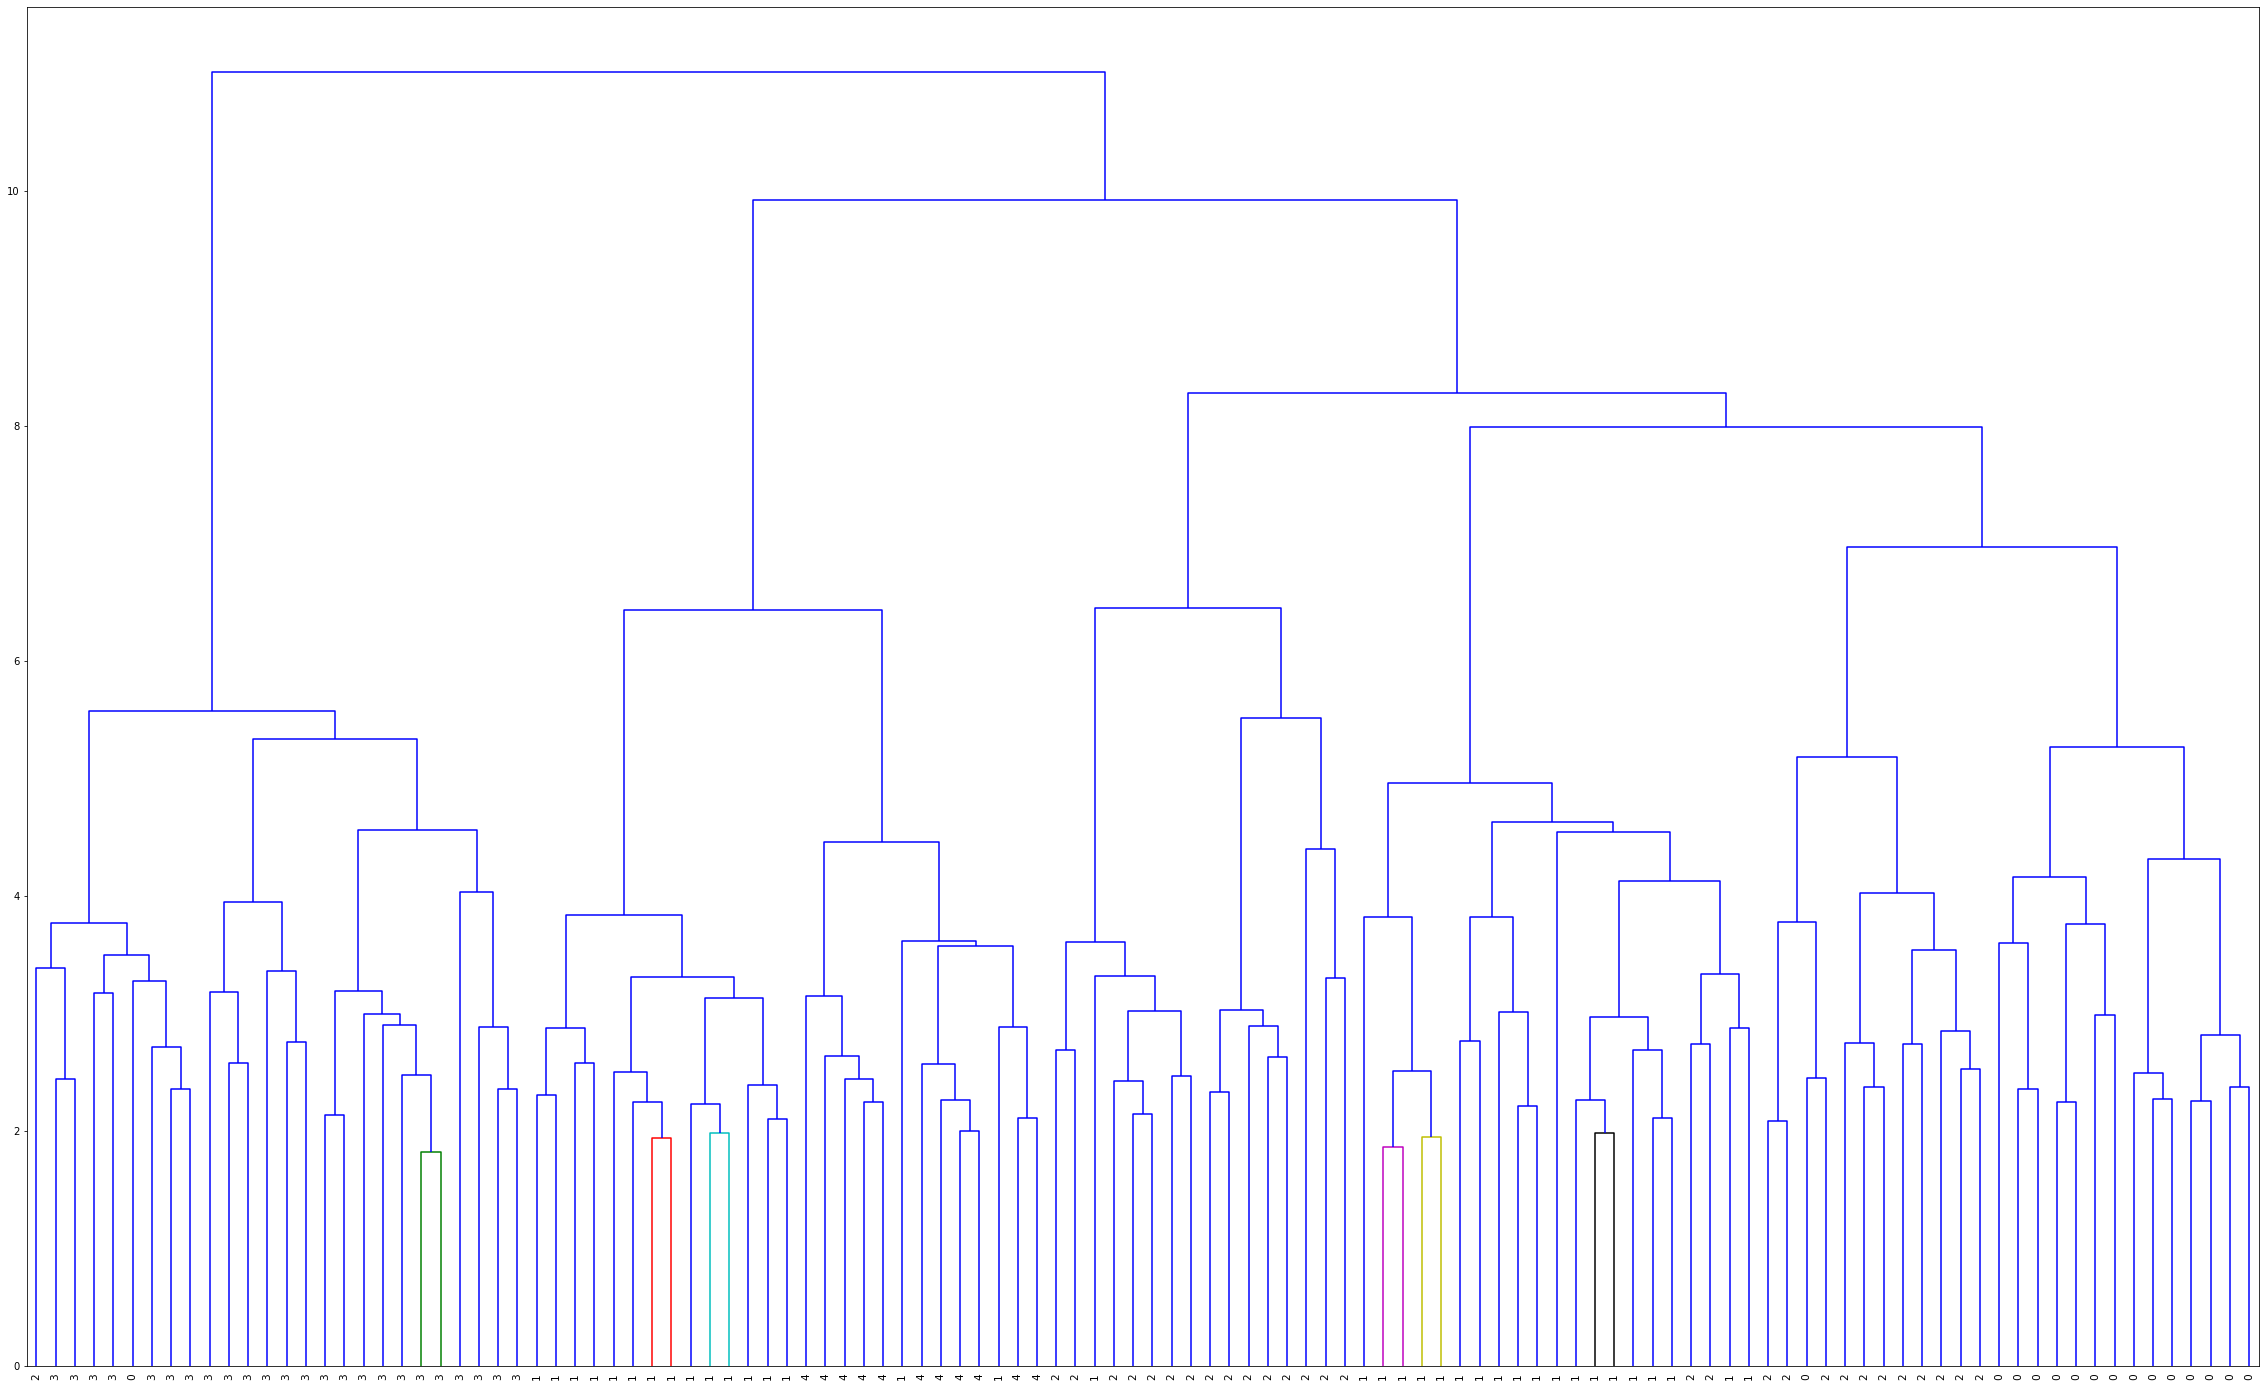

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt 
X =vecs 
Z = linkage(X, method="ward", metric="euclidean")
plt.figure(figsize=(40, 25))
dendrogram(Z, labels=labels,
               leaf_font_size=10.5,
               color_threshold=2.,
               )
plt.savefig("out98.png")

# 69. t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ

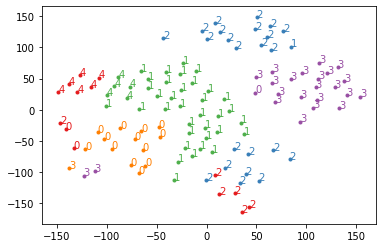

In [72]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
t_sne = TSNE(learning_rate=500).fit_transform(X)
predicts = KMeans(n_clusters=5).fit_predict(X)      

fig, ax = plt.subplots()
cmap = plt.get_cmap('Set')
for i, label in enumerate(labels):
    cval = cmap(predicts[i])
    ax.scatter(t_sne[i, 0], t_sne[i, 1], marker='.', color=cval)
    ax.annotate(label, xy=t_sne[i, :], color=cval)
plt.savefig("out99.png")